In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
from skimage.exposure import histogram, rescale_intensity
from iaf.plot import imshow
from iaf.notebook import init_style
from pathlib import Path
init_style()

# Basic image import, processing, and export

This example shows how to read an image, adjust the contrast in the image, and then write the adjusted image to a file.

## Read and display the image

Read an example image using the `imread` function from `scikit-image` into a variable `I`. 

In [2]:
I = imread(Path(Path.home() / "openbis/raw_data/20240916113758953-89/original/notebooks_data/pout.tif"))

The image is read as an NumPy array.

In [3]:
print(f"Image size = {I.shape}, data type = {I.dtype}, size in memory = {I.size} bytes.")
print(f"Type of the Image variable = {type(I)}")

Image size = (291, 240), data type = uint8, size in memory = 69840 bytes.
Type of the Image variable = <class 'numpy.ndarray'>


We can also use `%whos` to get similar information. We pass the `ndarray` filter to only get information related to numpy arrays.

In [4]:
%whos ndarray

Variable   Type       Data/Info
-------------------------------
I          ndarray    291x240: 69840 elems, type `uint8`, 69840 bytes


We can use `iaf.plot.imshow` to display the image.

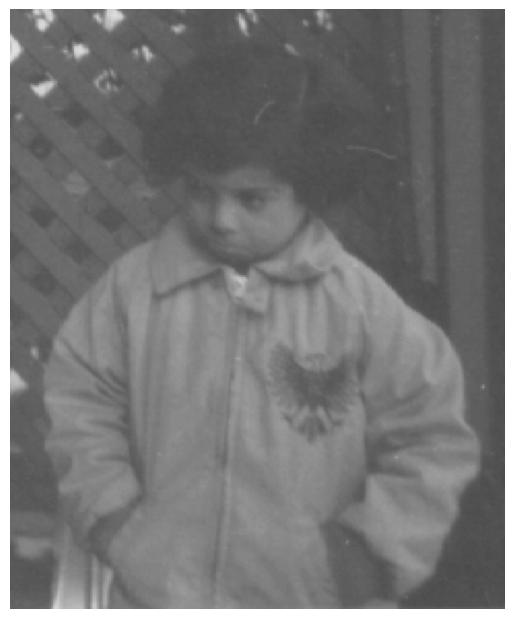

In [5]:
imshow(I, cmap="gray")

## Improve the image contrast

Let's look at the distribution of image pixel intensities. The image `pout.tif` is a somewhat low contrast image. To see the distribution of intensities in the image, we create a histogram by calling the `histogram` function (from `scikit-image.exposure`). Notice how the histogram indicates that the intensity range of the image is rather narrow. The range does not cover the potential range of [0, 255], and is missing the high and low values that would result in good contrast.

To return the histogram over the full range of the `uint8` data type, we pass the argument `source_rage="dtype"` to the `histogram()` function.

In [6]:
hist = histogram(I, source_range="dtype")

We can now plot the histogram.

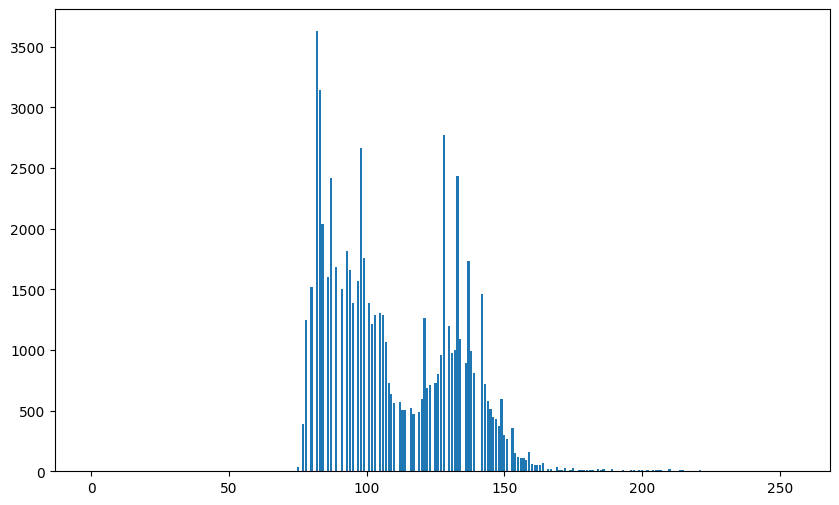

In [7]:
plt.bar(x=hist[1], height=hist[0]);

We can improve the contrast of an `uint8` image using the `rescale_intensity` function from `scikit-image` to stretch its intensities to cover the full `[0, 255]` dynamic range. By default, `rescale_intensity()` stretches the intensities between the minimum and maximum intensity values of the image.

In [8]:
I_out = rescale_intensity(I)

Let's look at the stretched image.

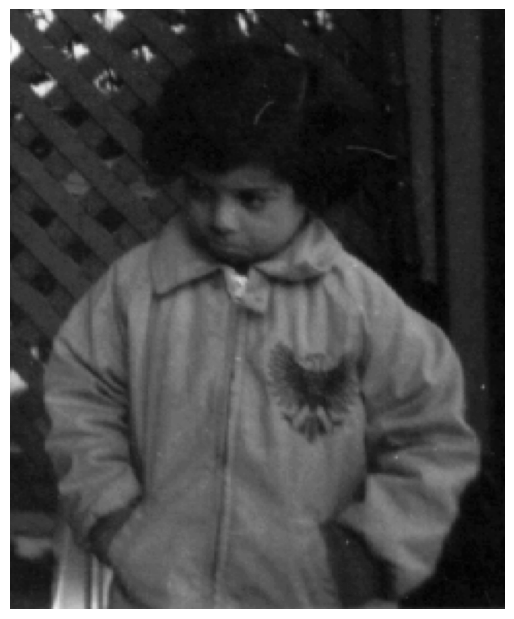

In [9]:
imshow(I_out)

The contrast didn't change much. How is that? Let's look at the updated histogram.

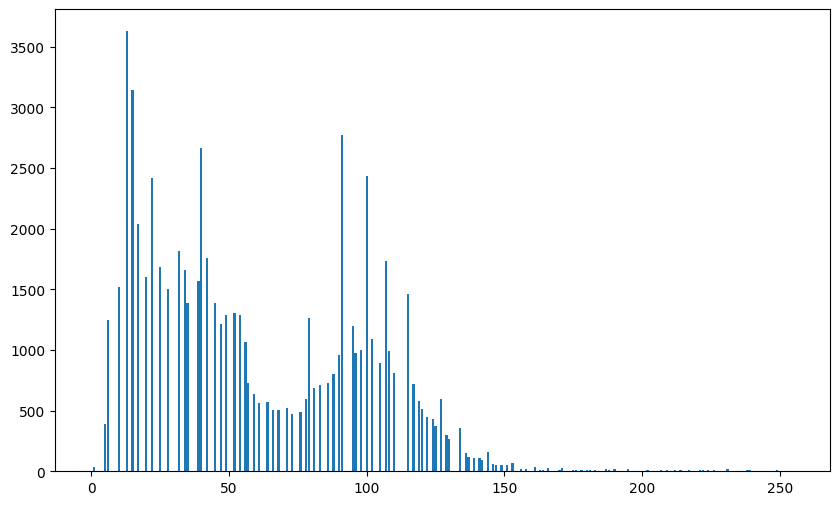

In [10]:
hist_out = histogram(I_out, source_range="dtype")
plt.bar(hist_out[1], hist_out[0]);

Even though the left part of the histogram has shifted towards 0 (i.e. dark pixels have become even darker), there does not seem to be a significant stretch in the right part of the histogram. Grays have stayed grays instead of becoming whiter.

We said that, by default, `rescale_intensity()` stretches the intensities between the minimum and maximum intensity values of the image. Let's have a look at what those values are in the original image. Since `I` is a numpy array, we can call the associated `min()` and `max()` methods on the array itself.

In [11]:
mn = I.min()
mx = I.max()
print(f"Minimum image intensity is {mn}; maximum image intensity is {mx}.")

Minimum image intensity is 74; maximum image intensity is 224.


This explains it: even though most of the intensity values were concentrated in a small range in the center of the histogram, the histogram shows a few bright pixels going almost all the way up to 255 (that is, 224).

A common trick in these cases is to drop some of the lowest and some of the highest intensities for the stretching, with the rationale that those could be *outliers* of the distribution of the image intensities.

We can do this with NumPy's `percentile()` function. We consider the new minimum and maximum values for stretching as the $2.5^{th}$ and the $97.5^{th}$ percentile of all image intensities, respectively. 5% of the extreme values are considered to be outliers. 

In [12]:
p_low, p_high = np.percentile(I, (2.5, 97.5))
print(f"2.5th percentile is {p_low}; 97.5th percentile is {p_high}.")

2.5th percentile is 80.0; 97.5th percentile is 153.0.


We can now use these values as new range limits in `rescale_intensity()`:

In [13]:
I_out_pc = rescale_intensity(I, in_range=(p_low, p_high))

Let's have a look at the new image.

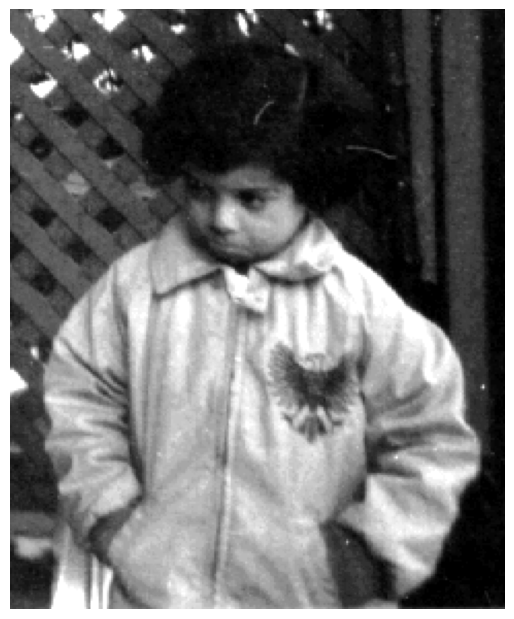

In [14]:
imshow(I_out_pc)

Let's plot the histogram as well.

In [15]:
hist_out_pc = histogram(I_out_pc, source_range="dtype")

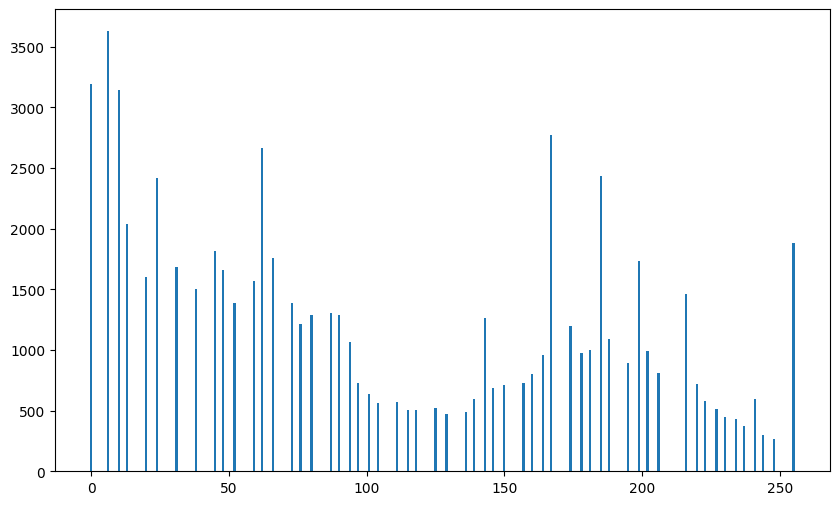

In [16]:
plt.bar(hist_out_pc[1], hist_out_pc[0]);

The histogram is now nicely spread over the whole `uint8` range.

## Save the contrast-enhanced image

We can save the stretched image to current folder as `pout_stretched.tif`.

In [17]:
imsave(Path(Path.home() / "results/pout_stretched.tif"), I_out_pc)

In [18]:
for f in Path(Path(Path.home() / "results")).glob("pout*.tif"):
    print(f)

/home/jovyan/results/pout_stretched.tif
